In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread
import os, shutil
import random as random
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

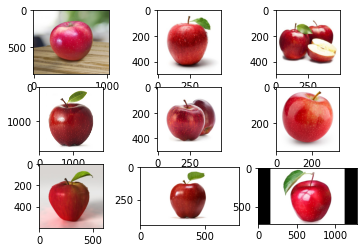

In [ ]:
path = 'train/'
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	filename = path + 'apple' + str(i+1) + '.jpg'
	image = imread(filename)
	pyplot.imshow(image)
pyplot.show()

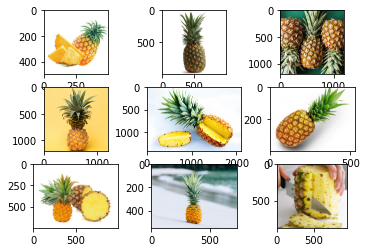

In [ ]:
path = 'train/'
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	filename = path + 'pineapple' + str(i+1) + '.jpg'
	image = imread(filename)
	pyplot.imshow(image)
pyplot.show()

In [ ]:
photos, labels = list(), list()
for file in os.listdir(path):
	output = 0.0
	if file.startswith('pineapple'):
		output = 1.0
	photo = load_img(path + file, target_size=(200, 200))
	photo = img_to_array(photo)
	photos.append(photo)
	labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('apples_vs_pineapples_photos.npy', photos)
save('apples_vs_pineapples_labels.npy', labels)

(40, 200, 200, 3) (40,)


In [ ]:
from numpy import load
photos = load('apples_vs_pineapples_photos.npy')
labels = load('apples_vs_pineapples_labels.npy')
print(photos.shape, labels.shape)

(40, 200, 200, 3) (40,)


In [ ]:
dataset_home = 'dataset_apples_vs_pineapples/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	labeldirs = ['apples/', 'pineapples/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		os.makedirs(newdir, exist_ok=True)

In [ ]:
random.seed(1)
val_ratio = 0.25
src_directory = 'train/'
for file in os.listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random.random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('apple'):
		dst = dataset_home + dst_dir + 'apples/'  + file
		shutil.copyfile(src, dst)
	elif file.startswith('pineapple'):
		dst = dataset_home + dst_dir + 'pineapples/'  + file
		shutil.copyfile(src, dst)

In [ ]:
# VGG 1
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
def summarize_diagnostics(history):
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig('VGG1_plot.png')
	pyplot.close()
 
def run_test_harness():
	model = define_model()
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	train_it = datagen.flow_from_directory('dataset_apples_vs_pineapples/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_apples_vs_pineapples/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=15, verbose=0)
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	summarize_diagnostics(history)
 
run_test_harness()

Found 25 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 73.333


In [ ]:
# VGG 1 with data augmentation
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
def summarize_diagnostics(history):
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig('VGG1_DA_plot.png')
	pyplot.close()
 
def run_test_harness():
	model = define_model()
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	train_it = train_datagen.flow_from_directory('dataset_apples_vs_pineapples/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = test_datagen.flow_from_directory('dataset_apples_vs_pineapples/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=15, verbose=0)
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	summarize_diagnostics(history)

run_test_harness()

Found 25 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 93.333


In [ ]:
# VGG model with transfer learning
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
def define_model():
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	for layer in model.layers:
		layer.trainable = False
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	model = Model(inputs=model.inputs, outputs=output)
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

def summarize_diagnostics(history):
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig('VGG1_TL_plot.png')
	pyplot.close()
 
def run_test_harness():
	model = define_model()
	datagen = ImageDataGenerator(featurewise_center=True)
	datagen.mean = [123.68, 116.779, 103.939]
	train_it = datagen.flow_from_directory('dataset_apples_vs_pineapples/train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('dataset_apples_vs_pineapples/test/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	summarize_diagnostics(history)
 
run_test_harness()

Found 25 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1/1 [==============================] - 22s 22s/step - loss: 5.3428 - accuracy: 0.4800 - val_loss: 0.0625 - val_accuracy: 0.9333
Epoch 2/10
1/1 [==============================] - 21s 21s/step - loss: 0.5810 - accuracy: 0.9600 - val_loss: 2.2910e-07 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 21s 21s/step - loss: 8.7032e-23 - accuracy: 1.0000 - val_loss: 2.3263e-10 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 21s 21s/step - loss: 1.3039e-32 - accuracy: 1.0000 - val_loss: 2.0128e-13 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 21s 21s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 6.0679e-16 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 21s 21s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.1005e-18 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 21s 21s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.5399e-21 - val_

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 100.000
